In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Expanded vocabulary
NUM_WORDS = 5000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# Vectorize inputs (bag-of-words encoding)
def vectorize(sequences, dimension=NUM_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.0
    return results

x_train_vec = vectorize(x_train)
x_test_vec = vectorize(x_test)

VAL_SPLIT = 10000
x_val, partial_x_train = x_train_vec[:VAL_SPLIT], x_train_vec[VAL_SPLIT:]
y_val, partial_y_train = y_train[:VAL_SPLIT], y_train[VAL_SPLIT:]


In [15]:
def train_and_plot(units, lr, dropout=0.4, l2_reg=0.001, epochs=30):
    model = keras.Sequential([
        keras.Input(shape=(NUM_WORDS,)),
        layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout),
        layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Train FULL EPOCHS (no early stopping)
    history = model.fit(
        partial_x_train, partial_y_train,
        epochs=epochs,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=2
    )

    # Plot Loss
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Val loss')
    plt.title(f'Loss ({units} units, lr={lr})')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train acc')
    plt.plot(history.history['val_accuracy'], label='Val acc')
    plt.title(f'Accuracy ({units} units, lr={lr})')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
    plt.show()

    val_acc = max(history.history['val_accuracy'])
    print(f'Best Validation Accuracy: {val_acc:.4f}')
    return val_acc



===== Training 4-unit network, LR=0.0001 =====
Epoch 1/30
30/30 - 1s - 21ms/step - accuracy: 0.4938 - loss: 0.7094 - val_accuracy: 0.5081 - val_loss: 0.7049
Epoch 2/30
30/30 - 0s - 2ms/step - accuracy: 0.5251 - loss: 0.7032 - val_accuracy: 0.5430 - val_loss: 0.7020
Epoch 3/30
30/30 - 0s - 3ms/step - accuracy: 0.5444 - loss: 0.6996 - val_accuracy: 0.5683 - val_loss: 0.6977
Epoch 4/30
30/30 - 0s - 2ms/step - accuracy: 0.5581 - loss: 0.6961 - val_accuracy: 0.5869 - val_loss: 0.6920
Epoch 5/30
30/30 - 0s - 2ms/step - accuracy: 0.5847 - loss: 0.6876 - val_accuracy: 0.5853 - val_loss: 0.6825
Epoch 6/30
30/30 - 0s - 2ms/step - accuracy: 0.6004 - loss: 0.6795 - val_accuracy: 0.6037 - val_loss: 0.6711
Epoch 7/30
30/30 - 0s - 2ms/step - accuracy: 0.6309 - loss: 0.6664 - val_accuracy: 0.6067 - val_loss: 0.6587
Epoch 8/30
30/30 - 0s - 2ms/step - accuracy: 0.6399 - loss: 0.6572 - val_accuracy: 0.6286 - val_loss: 0.6484
Epoch 9/30
30/30 - 0s - 2ms/step - accuracy: 0.6637 - loss: 0.6500 - val_accura

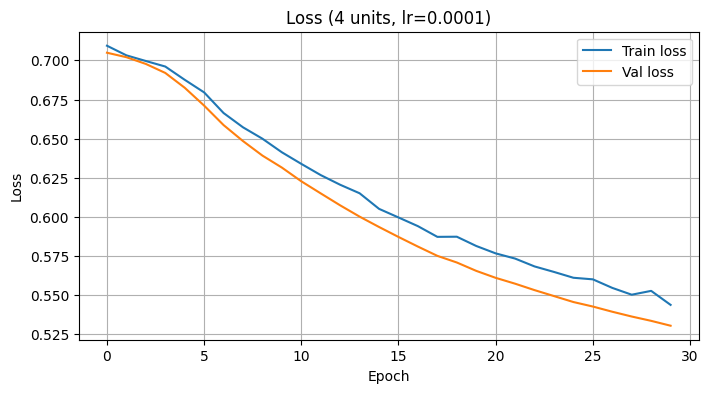

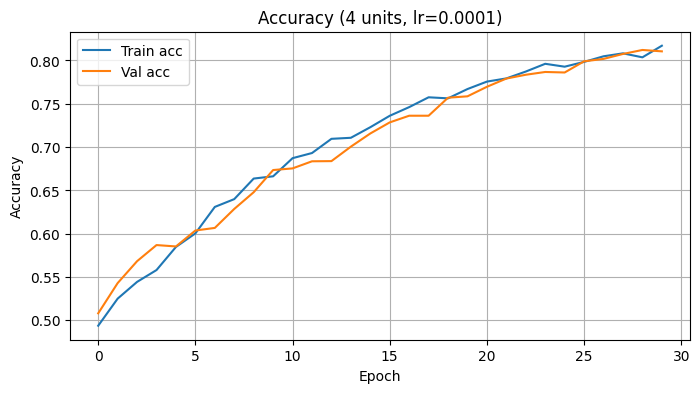

Best Validation Accuracy: 0.8121

===== Training 4-unit network, LR=0.001 =====
Epoch 1/30
30/30 - 0s - 15ms/step - accuracy: 0.5371 - loss: 0.6971 - val_accuracy: 0.7664 - val_loss: 0.6846
Epoch 2/30
30/30 - 0s - 2ms/step - accuracy: 0.5990 - loss: 0.6708 - val_accuracy: 0.8292 - val_loss: 0.6433
Epoch 3/30
30/30 - 0s - 2ms/step - accuracy: 0.6425 - loss: 0.6304 - val_accuracy: 0.8379 - val_loss: 0.6028
Epoch 4/30
30/30 - 0s - 2ms/step - accuracy: 0.7142 - loss: 0.5883 - val_accuracy: 0.8630 - val_loss: 0.5592
Epoch 5/30
30/30 - 0s - 2ms/step - accuracy: 0.7457 - loss: 0.5556 - val_accuracy: 0.8688 - val_loss: 0.5210
Epoch 6/30
30/30 - 0s - 2ms/step - accuracy: 0.7674 - loss: 0.5268 - val_accuracy: 0.8738 - val_loss: 0.4934
Epoch 7/30
30/30 - 0s - 2ms/step - accuracy: 0.7867 - loss: 0.5066 - val_accuracy: 0.8772 - val_loss: 0.4703
Epoch 8/30
30/30 - 0s - 2ms/step - accuracy: 0.7962 - loss: 0.4917 - val_accuracy: 0.8799 - val_loss: 0.4527
Epoch 9/30
30/30 - 0s - 2ms/step - accuracy: 0.

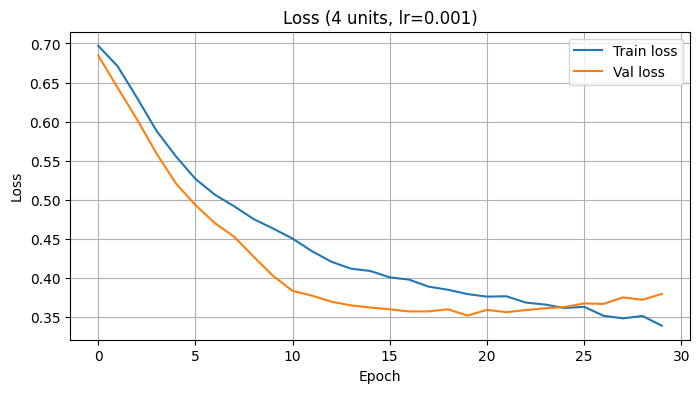

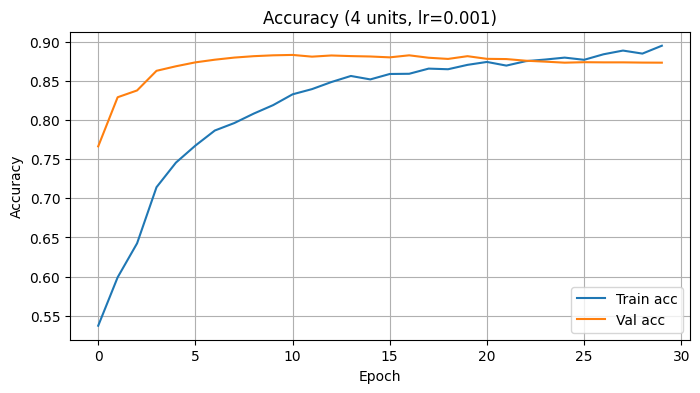

Best Validation Accuracy: 0.8833

===== Training 4-unit network, LR=0.01 =====
Epoch 1/30
30/30 - 0s - 16ms/step - accuracy: 0.5810 - loss: 0.6765 - val_accuracy: 0.8508 - val_loss: 0.5849
Epoch 2/30
30/30 - 0s - 2ms/step - accuracy: 0.6321 - loss: 0.6280 - val_accuracy: 0.8685 - val_loss: 0.5070
Epoch 3/30
30/30 - 0s - 2ms/step - accuracy: 0.6422 - loss: 0.6174 - val_accuracy: 0.8623 - val_loss: 0.4978
Epoch 4/30
30/30 - 0s - 2ms/step - accuracy: 0.6933 - loss: 0.5942 - val_accuracy: 0.8604 - val_loss: 0.4695
Epoch 5/30
30/30 - 0s - 2ms/step - accuracy: 0.6993 - loss: 0.5927 - val_accuracy: 0.8566 - val_loss: 0.4828
Epoch 6/30
30/30 - 0s - 2ms/step - accuracy: 0.7526 - loss: 0.5728 - val_accuracy: 0.8495 - val_loss: 0.4811
Epoch 7/30
30/30 - 0s - 2ms/step - accuracy: 0.7696 - loss: 0.5641 - val_accuracy: 0.8436 - val_loss: 0.4861
Epoch 8/30
30/30 - 0s - 2ms/step - accuracy: 0.7752 - loss: 0.5493 - val_accuracy: 0.8666 - val_loss: 0.4515
Epoch 9/30
30/30 - 0s - 2ms/step - accuracy: 0.7

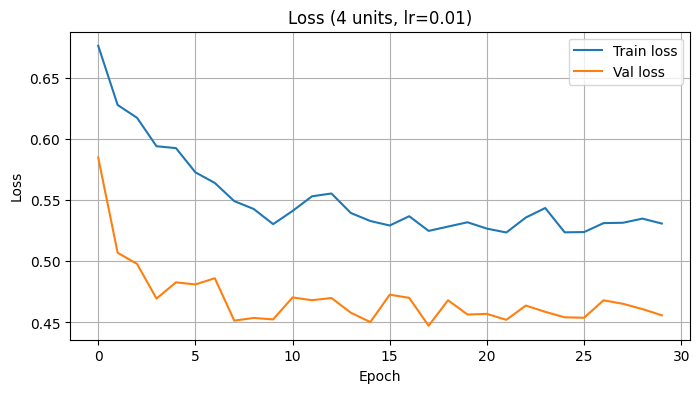

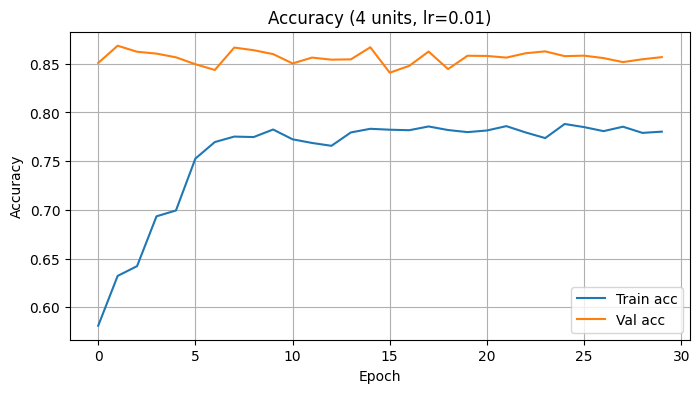

Best Validation Accuracy: 0.8685

===== Training 16-unit network, LR=0.0001 =====
Epoch 1/30
30/30 - 0s - 16ms/step - accuracy: 0.5153 - loss: 0.7442 - val_accuracy: 0.5542 - val_loss: 0.7327
Epoch 2/30
30/30 - 0s - 3ms/step - accuracy: 0.5477 - loss: 0.7304 - val_accuracy: 0.6099 - val_loss: 0.7229
Epoch 3/30
30/30 - 0s - 3ms/step - accuracy: 0.5766 - loss: 0.7204 - val_accuracy: 0.6537 - val_loss: 0.7072
Epoch 4/30
30/30 - 0s - 3ms/step - accuracy: 0.6090 - loss: 0.7028 - val_accuracy: 0.7131 - val_loss: 0.6825
Epoch 5/30
30/30 - 0s - 3ms/step - accuracy: 0.6427 - loss: 0.6821 - val_accuracy: 0.7691 - val_loss: 0.6510
Epoch 6/30
30/30 - 0s - 3ms/step - accuracy: 0.6694 - loss: 0.6589 - val_accuracy: 0.7934 - val_loss: 0.6191
Epoch 7/30
30/30 - 0s - 3ms/step - accuracy: 0.6958 - loss: 0.6375 - val_accuracy: 0.8133 - val_loss: 0.5935
Epoch 8/30
30/30 - 0s - 3ms/step - accuracy: 0.7147 - loss: 0.6178 - val_accuracy: 0.8269 - val_loss: 0.5674
Epoch 9/30
30/30 - 0s - 3ms/step - accuracy: 

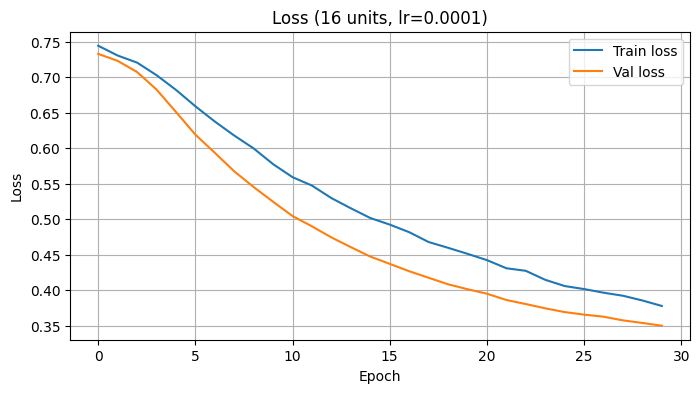

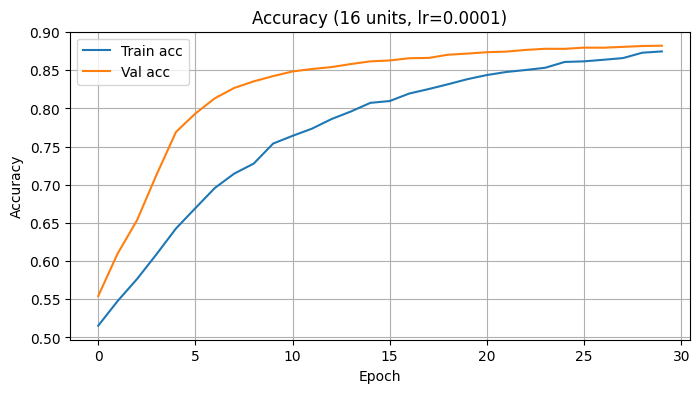

Best Validation Accuracy: 0.8822

===== Training 16-unit network, LR=0.001 =====
Epoch 1/30
30/30 - 0s - 16ms/step - accuracy: 0.6054 - loss: 0.6996 - val_accuracy: 0.8087 - val_loss: 0.6114
Epoch 2/30
30/30 - 0s - 3ms/step - accuracy: 0.7528 - loss: 0.5790 - val_accuracy: 0.8571 - val_loss: 0.4731
Epoch 3/30
30/30 - 0s - 3ms/step - accuracy: 0.8271 - loss: 0.4749 - val_accuracy: 0.8731 - val_loss: 0.3957
Epoch 4/30
30/30 - 0s - 3ms/step - accuracy: 0.8633 - loss: 0.3989 - val_accuracy: 0.8792 - val_loss: 0.3545
Epoch 5/30
30/30 - 0s - 3ms/step - accuracy: 0.8875 - loss: 0.3554 - val_accuracy: 0.8825 - val_loss: 0.3412
Epoch 6/30
30/30 - 0s - 3ms/step - accuracy: 0.9071 - loss: 0.3224 - val_accuracy: 0.8842 - val_loss: 0.3352
Epoch 7/30
30/30 - 0s - 3ms/step - accuracy: 0.9139 - loss: 0.2972 - val_accuracy: 0.8823 - val_loss: 0.3369
Epoch 8/30
30/30 - 0s - 3ms/step - accuracy: 0.9249 - loss: 0.2736 - val_accuracy: 0.8829 - val_loss: 0.3420
Epoch 9/30
30/30 - 0s - 3ms/step - accuracy: 0

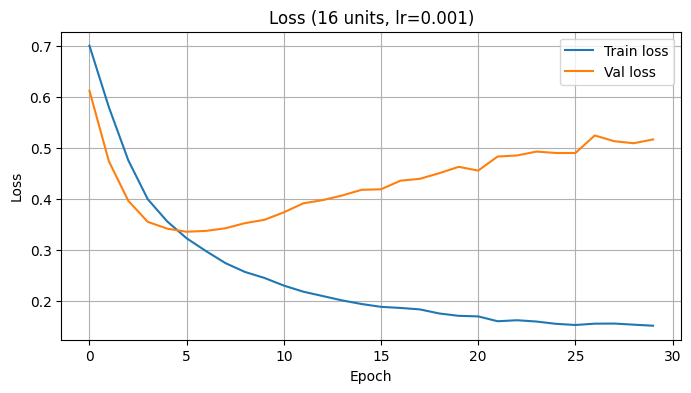

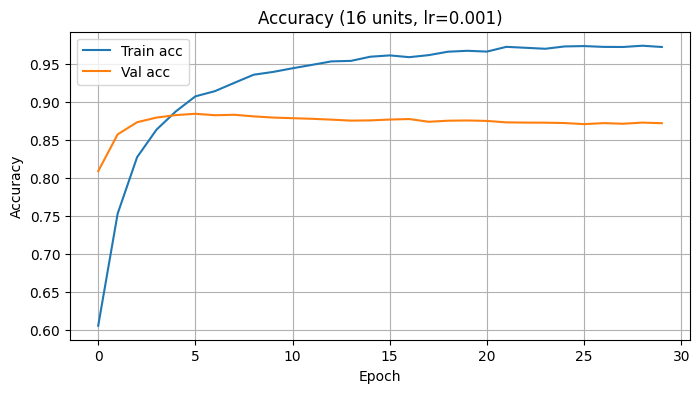

Best Validation Accuracy: 0.8842

===== Training 16-unit network, LR=0.01 =====
Epoch 1/30
30/30 - 0s - 16ms/step - accuracy: 0.6664 - loss: 0.6495 - val_accuracy: 0.8704 - val_loss: 0.4333
Epoch 2/30
30/30 - 0s - 3ms/step - accuracy: 0.8330 - loss: 0.4789 - val_accuracy: 0.8708 - val_loss: 0.4010
Epoch 3/30
30/30 - 0s - 3ms/step - accuracy: 0.8568 - loss: 0.4459 - val_accuracy: 0.8612 - val_loss: 0.4256
Epoch 4/30
30/30 - 0s - 3ms/step - accuracy: 0.8677 - loss: 0.4360 - val_accuracy: 0.8702 - val_loss: 0.4248
Epoch 5/30
30/30 - 0s - 3ms/step - accuracy: 0.8769 - loss: 0.4221 - val_accuracy: 0.8625 - val_loss: 0.4325
Epoch 6/30
30/30 - 0s - 3ms/step - accuracy: 0.8680 - loss: 0.4327 - val_accuracy: 0.8628 - val_loss: 0.4366
Epoch 7/30
30/30 - 0s - 3ms/step - accuracy: 0.8683 - loss: 0.4343 - val_accuracy: 0.8684 - val_loss: 0.4316
Epoch 8/30
30/30 - 0s - 3ms/step - accuracy: 0.8693 - loss: 0.4277 - val_accuracy: 0.8688 - val_loss: 0.4418
Epoch 9/30
30/30 - 0s - 3ms/step - accuracy: 0.

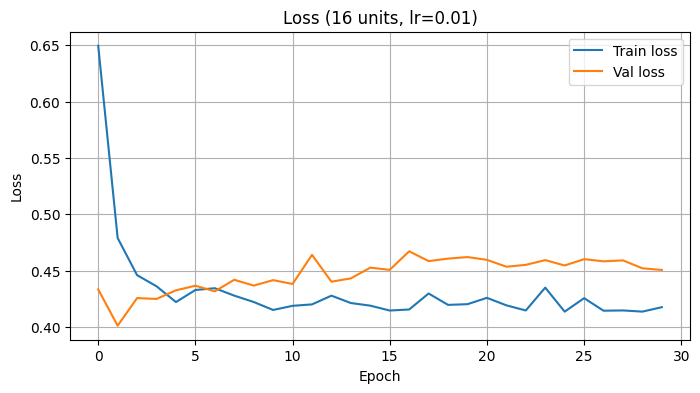

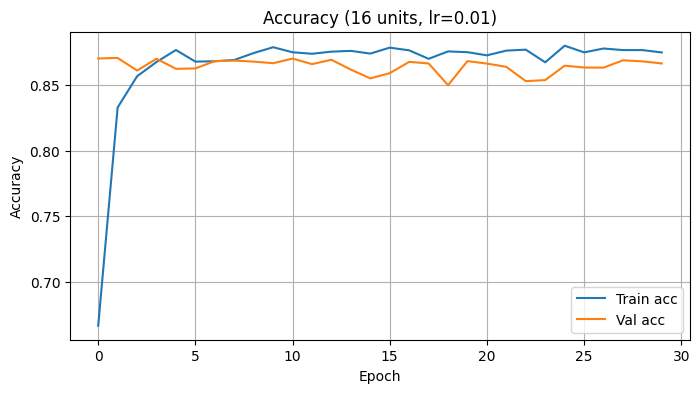

Best Validation Accuracy: 0.8708

===== Training 512-unit network, LR=0.0001 =====
Epoch 1/30
30/30 - 1s - 44ms/step - accuracy: 0.6174 - loss: 2.0399 - val_accuracy: 0.7846 - val_loss: 1.9195
Epoch 2/30
30/30 - 1s - 21ms/step - accuracy: 0.7797 - loss: 1.8079 - val_accuracy: 0.8286 - val_loss: 1.6624
Epoch 3/30
30/30 - 1s - 21ms/step - accuracy: 0.8353 - loss: 1.5675 - val_accuracy: 0.8550 - val_loss: 1.4584
Epoch 4/30
30/30 - 1s - 21ms/step - accuracy: 0.8677 - loss: 1.3880 - val_accuracy: 0.8745 - val_loss: 1.3260
Epoch 5/30
30/30 - 1s - 21ms/step - accuracy: 0.8893 - loss: 1.2580 - val_accuracy: 0.8810 - val_loss: 1.2331
Epoch 6/30
30/30 - 1s - 21ms/step - accuracy: 0.9066 - loss: 1.1516 - val_accuracy: 0.8831 - val_loss: 1.1596
Epoch 7/30
30/30 - 1s - 21ms/step - accuracy: 0.9172 - loss: 1.0650 - val_accuracy: 0.8839 - val_loss: 1.0992
Epoch 8/30
30/30 - 1s - 21ms/step - accuracy: 0.9229 - loss: 0.9897 - val_accuracy: 0.8837 - val_loss: 1.0480
Epoch 9/30
30/30 - 1s - 21ms/step - a

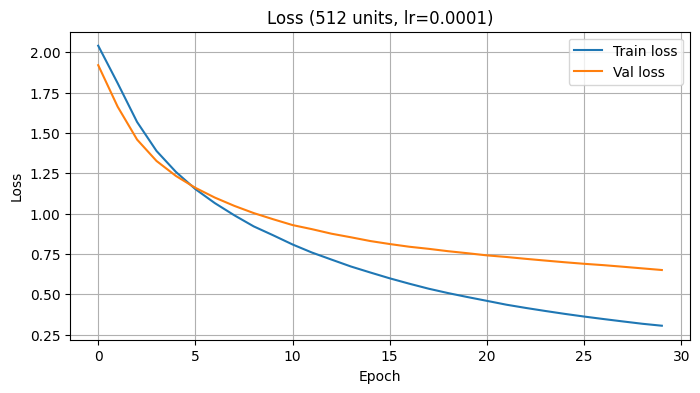

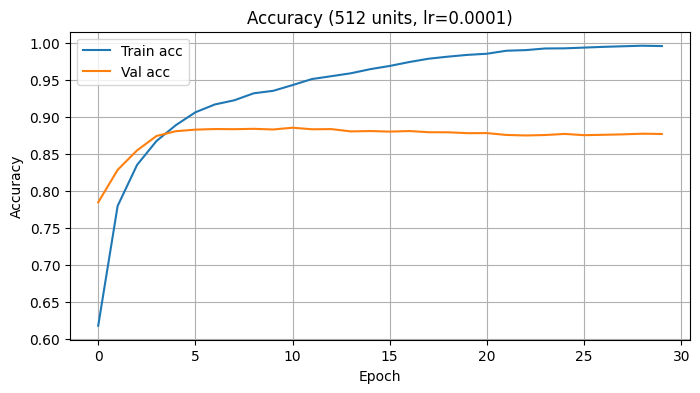

Best Validation Accuracy: 0.8857

===== Training 512-unit network, LR=0.001 =====
Epoch 1/30
30/30 - 1s - 36ms/step - accuracy: 0.7908 - loss: 1.4161 - val_accuracy: 0.8801 - val_loss: 0.9280
Epoch 2/30
30/30 - 1s - 23ms/step - accuracy: 0.9093 - loss: 0.7339 - val_accuracy: 0.8766 - val_loss: 0.6911
Epoch 3/30
30/30 - 1s - 22ms/step - accuracy: 0.9347 - loss: 0.5113 - val_accuracy: 0.8722 - val_loss: 0.6020
Epoch 4/30
30/30 - 1s - 21ms/step - accuracy: 0.9504 - loss: 0.4035 - val_accuracy: 0.8753 - val_loss: 0.5636
Epoch 5/30
30/30 - 1s - 21ms/step - accuracy: 0.9652 - loss: 0.3326 - val_accuracy: 0.8411 - val_loss: 0.6435
Epoch 6/30
30/30 - 1s - 22ms/step - accuracy: 0.9712 - loss: 0.3012 - val_accuracy: 0.8701 - val_loss: 0.5587
Epoch 7/30
30/30 - 1s - 22ms/step - accuracy: 0.9861 - loss: 0.2516 - val_accuracy: 0.8705 - val_loss: 0.5563
Epoch 8/30
30/30 - 1s - 22ms/step - accuracy: 0.9882 - loss: 0.2257 - val_accuracy: 0.8720 - val_loss: 0.5539
Epoch 9/30
30/30 - 1s - 21ms/step - ac

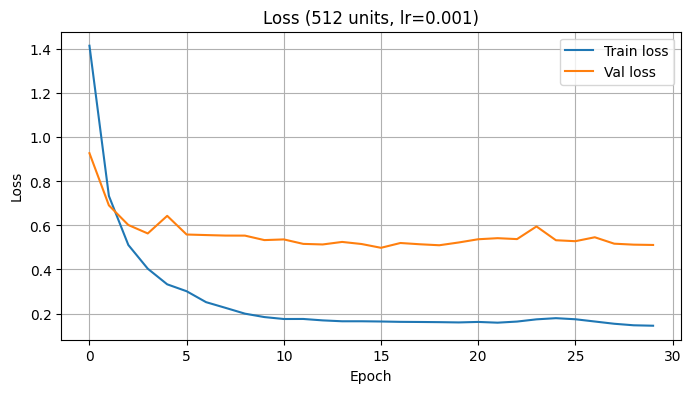

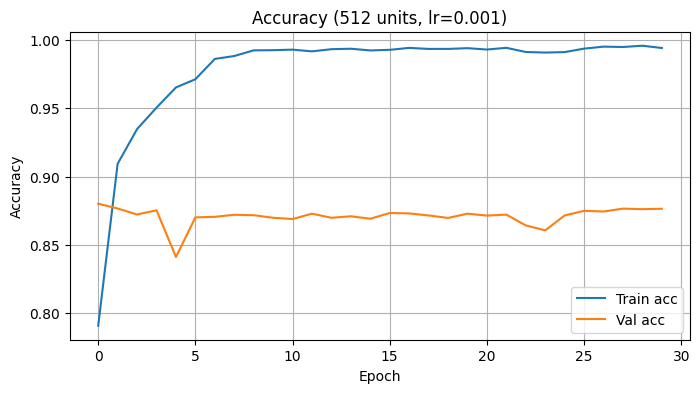

Best Validation Accuracy: 0.8801

===== Training 512-unit network, LR=0.01 =====
Epoch 1/30
30/30 - 1s - 35ms/step - accuracy: 0.7324 - loss: 1.8769 - val_accuracy: 0.8749 - val_loss: 0.9524
Epoch 2/30
30/30 - 1s - 22ms/step - accuracy: 0.8832 - loss: 0.7885 - val_accuracy: 0.8742 - val_loss: 0.7160
Epoch 3/30
30/30 - 1s - 22ms/step - accuracy: 0.8937 - loss: 0.6005 - val_accuracy: 0.8710 - val_loss: 0.5927
Epoch 4/30
30/30 - 1s - 21ms/step - accuracy: 0.8961 - loss: 0.5402 - val_accuracy: 0.8639 - val_loss: 0.5839
Epoch 5/30
30/30 - 1s - 22ms/step - accuracy: 0.8998 - loss: 0.5147 - val_accuracy: 0.8655 - val_loss: 0.5760
Epoch 6/30
30/30 - 1s - 22ms/step - accuracy: 0.8976 - loss: 0.5001 - val_accuracy: 0.8626 - val_loss: 0.5523
Epoch 7/30
30/30 - 1s - 22ms/step - accuracy: 0.9013 - loss: 0.4824 - val_accuracy: 0.8625 - val_loss: 0.5636
Epoch 8/30
30/30 - 1s - 22ms/step - accuracy: 0.8978 - loss: 0.4936 - val_accuracy: 0.8695 - val_loss: 0.5562
Epoch 9/30
30/30 - 1s - 22ms/step - acc

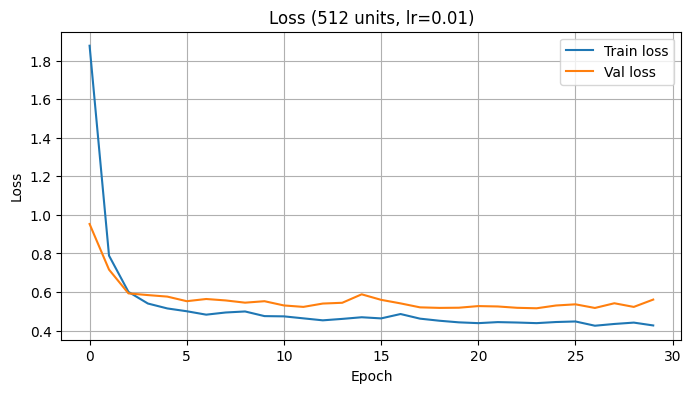

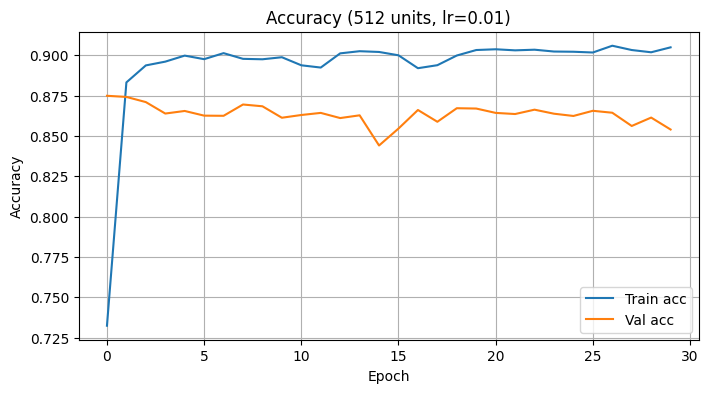

Best Validation Accuracy: 0.8749

Summary of Best Validation Accuracies:
  4 units @ 0.0001: 0.8121
  4 units @  0.001: 0.8833
  4 units @   0.01: 0.8685
 16 units @ 0.0001: 0.8822
 16 units @  0.001: 0.8842
 16 units @   0.01: 0.8708
512 units @ 0.0001: 0.8857
512 units @  0.001: 0.8801
512 units @   0.01: 0.8749


In [16]:
learning_rates = [1e-4, 1e-3, 1e-2]
architectures = [4, 16, 512]
results = {}

for units in architectures:
    results[units] = {}
    for lr in learning_rates:
        print(f"\n===== Training {units}-unit network, LR={lr} =====")
        acc = train_and_plot(units, lr, epochs=30)
        results[units][lr] = acc

print("\nSummary of Best Validation Accuracies:")
for u in results:
    for lr in results[u]:
        print(f"{u:>3} units @ {lr:>6}: {results[u][lr]:.4f}")
